<a href="https://colab.research.google.com/github/Madhusudan0012/Artificial-intelligence-./blob/main/MyNV_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math

class NaiveBayesSentiment:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.word_counts = {'positive': {}, 'negative': {}}
        self.class_counts = {'positive': 0, 'negative': 0}
        self.vocabulary = set()

    def train(self, texts, labels):
        for text, label in zip(texts, labels):
            words = text.lower().split()
            self.class_counts[label] += 1

            for word in words:
                self.vocabulary.add(word)
                if word not in self.word_counts[label]:
                    self.word_counts[label][word] = 0
                self.word_counts[label][word] += 1

    def calculate_probability(self, text, label):
        words = text.lower().split()
        log_prob = math.log(self.class_counts[label] / sum(self.class_counts.values()))

        for word in words:
            count = self.word_counts[label].get(word, 0)
            total_words = sum(self.word_counts[label].values())
            prob = (count + self.alpha) / (total_words + self.alpha * len(self.vocabulary))
            log_prob += math.log(prob)

        return log_prob

    def predict(self, text):
        positive_prob = self.calculate_probability(text, 'positive')
        negative_prob = self.calculate_probability(text, 'negative')

        return 'positive' if positive_prob > negative_prob else 'negative'

# Example usage
if __name__ == "__main__":
    # Training data: Movie reviews
    training_texts = [
        "I loved the movie it was fantastic",
        "What a brilliant performance",
        "Absolutely terrible and boring",
        "Hated every minute of it",
        "Great direction and amazing acting",
        "Worst movie ever made",
        "Such a heartwarming story",
        "Disappointing and poorly executed"
    ]
    training_labels = ["positive", "positive", "negative", "negative", "positive", "negative", "positive", "negative"]

    # Test data
    test_texts = [
        "What an amazing movie",
        "I hated the acting",
        "The story was heartwarming and brilliant"
    ]

    # Train the classifier
    classifier = NaiveBayesSentiment(alpha=1.0)
    classifier.train(training_texts, training_labels)

    # Predict results for test data
    for text in test_texts:
        prediction = classifier.predict(text)
        print(f"Review: '{text}' => Predicted Sentiment: {prediction}")


Review: 'What an amazing movie' => Predicted Sentiment: positive
Review: 'I hated the acting' => Predicted Sentiment: positive
Review: 'The story was heartwarming and brilliant' => Predicted Sentiment: positive


alpha used in the equation is the smoothing parameter used in the Laplace Smoothing technique. This parameter helps avoid issues caused by words that appear in the test data but not in the training data. Without smoothing, such unseen words would make the probability of a class zero because the model multiplies probabilities, and any zero value causes the entire result to become zero.

**Why use alpha?**

Handles zero probabilities: Ensures that every word in the vocabulary has a small non-zero probability, even if it’s not present in the training data.

Balances the influence of rare words: With higher values of alpha, rare words have less impact on the model's predictions.
Default value: alpha=1 is common and ensures simple Laplace smoothing.

**Effect of alpha:**

alpha=0: No smoothing; unseen words can lead to zero probabilities.
alpha=1: Standard Laplace smoothing.

Higher values : More aggressive smoothing, reducing the impact of frequent words.


class NaiveBayesSentiment:
    def __init__(self, alpha=1.0):
        """
        Initialize the Naive Bayes Sentiment Classifier.
        
        :param alpha: Smoothing parameter (default = 1.0).
        """
        self.alpha = alpha
        self.word_counts = {'positive': {}, 'negative': {}}
        self.class_counts = {'positive': 0, 'negative': 0}
        self.vocabulary = set()

    def train(self, texts, labels):
        """
        Train the classifier on labeled data.
        
        :param texts: List of text samples (strings).
        :param labels: List of corresponding labels ('positive' or 'negative').
        """
        for text, label in zip(texts, labels):
            words = text.lower().split()
            self.class_counts[label] += 1

            for word in words:
                self.vocabulary.add(word)
                if word not in self.word_counts[label]:
                    self.word_counts[label][word] = 0
                self.word_counts[label][word] += 1

    def calculate_probability(self, text, label):
        """
        Calculate the log-probability of a text for a given class label.
        
        :param text: The input text to classify.
        :param label: The class label ('positive' or 'negative').
        :return: Log-probability of the text belonging to the label.
        """
        words = text.lower().split()
        log_prob = math.log(self.class_counts[label] / sum(self.class_counts.values()))

        for word in words:
            count = self.word_counts[label].get(word, 0)
            total_words = sum(self.word_counts[label].values())
            prob = (count + self.alpha) / (total_words + self.alpha * len(self.vocabulary))
            log_prob += math.log(prob)

        return log_prob

    def predict(self, text):
        """
        Predict the sentiment ('positive' or 'negative') of a given text.
        
        :param text: The input text to classify.
        :return: Predicted sentiment label ('positive' or 'negative').
        """
        positive_prob = self.calculate_probability(text, 'positive')
        negative_prob = self.calculate_probability(text, 'negative')

        return 'positive' if positive_prob > negative_prob else 'negative'


In [2]:
# Training data
training_texts = ["I loved the movie", "It was terrible", "Fantastic story", "Awful acting"]
training_labels = ["positive", "negative", "positive", "negative"]

# Initialize the model
classifier = NaiveBayesSentiment(alpha=1.0)

# Train the model
classifier.train(training_texts, training_labels)

# Test prediction
print(classifier.predict("Fantastic and amazing"))  # Output: positive
print(classifier.predict("Terrible experience"))    # Output: negative


positive
negative


In [3]:
import math

class NaiveBayesSpamClassifier:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.word_counts = {'spam': {}, 'not_spam': {}}
        self.class_counts = {'spam': 0, 'not_spam': 0}
        self.vocabulary = set()

    def train(self, texts, labels):
        """
        Trains the Naive Bayes classifier.

        :param texts: List of email texts (strings)
        :param labels: List of labels ('spam' or 'not_spam')
        """
        for text, label in zip(texts, labels):
            words = text.lower().split()
            self.class_counts[label] += 1

            for word in words:
                self.vocabulary.add(word)
                if word not in self.word_counts[label]:
                    self.word_counts[label][word] = 0
                self.word_counts[label][word] += 1

    def calculate_probability(self, text, label):
        """
        Calculates the log-probability of a text belonging to a specific class.

        :param text: The text to classify
        :param label: The class label ('spam' or 'not_spam')
        :return: Log-probability of the text being in the class
        """
        words = text.lower().split()
        log_prob = math.log(self.class_counts[label] / sum(self.class_counts.values()))

        for word in words:
            count = self.word_counts[label].get(word, 0)
            total_words = sum(self.word_counts[label].values())
            prob = (count + self.alpha) / (total_words + self.alpha * len(self.vocabulary))
            log_prob += math.log(prob)

        return log_prob

    def predict(self, text):
        """
        Predicts whether a text is 'spam' or 'not_spam'.

        :param text: The text to classify
        :return: The predicted class label
        """
        spam_prob = self.calculate_probability(text, 'spam')
        not_spam_prob = self.calculate_probability(text, 'not_spam')

        return 'spam' if spam_prob > not_spam_prob else 'not_spam'

    def evaluate(self, texts, labels):
        """
        Evaluates the classifier on a test set.

        :param texts: List of email texts
        :param labels: List of true labels
        :return: Accuracy of the classifier
        """
        correct_predictions = sum(self.predict(text) == label for text, label in zip(texts, labels))
        return correct_predictions / len(labels)

# Example usage:
if __name__ == "__main__":
    # Training data
    training_texts = [
        "Buy now and get 50% off!",
        "Limited offer, claim your discount",
        "Meeting at 3 PM tomorrow",
        "Can we schedule a call for next week?",
        "Win a free trip to Bali!",
        "Lunch with the team on Friday"
    ]
    training_labels = ["spam", "spam", "not_spam", "not_spam", "spam", "not_spam"]

    # Test data
    test_texts = [
        "Claim your free prize now!",
        "Let's catch up next week",
        "Exclusive offer just for you"
    ]
    test_labels = ["spam", "not_spam", "spam"]

    # Train the classifier
    classifier = NaiveBayesSpamClassifier(alpha=1.0)
    classifier.train(training_texts, training_labels)

    # Evaluate the classifier
    accuracy = classifier.evaluate(test_texts, test_labels)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Predict individual examples
    for text in test_texts:
        prediction = classifier.predict(text)
        print(f"Text: '{text}' => Predicted: {prediction}")


Accuracy: 66.67%
Text: 'Claim your free prize now!' => Predicted: spam
Text: 'Let's catch up next week' => Predicted: not_spam
Text: 'Exclusive offer just for you' => Predicted: not_spam


In [5]:
import csv
import math
from collections import defaultdict

# Step 1: Separate By Class
def separate_by_class(dataset):
    separated = defaultdict(list)
    for row in dataset:
        features, label = row[:-1], row[-1]
        separated[label].append(features)
    return separated

# Step 2: Summarize Dataset
def summarize_dataset(dataset):
    summaries = [(mean(column), stdev(column)) for column in zip(*dataset)]
    return summaries

# Step 3: Summarize Data By Class
def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = {}
    for class_value, rows in separated.items():
        summaries[class_value] = summarize_dataset(rows)
    return summaries

# Helper: Mean of a list
def mean(numbers):
    return sum(numbers) / len(numbers)

# Helper: Standard Deviation of a list
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([(x - avg) ** 2 for x in numbers]) / (len(numbers) - 1)
    return math.sqrt(variance)

# Step 4: Gaussian Probability Density Function
def gaussian_probability(x, mean, stdev):
    exponent = math.exp(-((x - mean) ** 2 / (2 * stdev ** 2)))
    return (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent

# Step 5: Class Probabilities
def calculate_class_probabilities(summaries, row):
    total_rows = sum([len(rows) for rows in summaries.values()])
    probabilities = {}
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = len(class_summaries) / total_rows
        for i, (mean, stdev) in enumerate(class_summaries):
            probabilities[class_value] *= gaussian_probability(row[i], mean, stdev)
    return probabilities

# Predict the class for a single row
def predict(summaries, row):
    probabilities = calculate_class_probabilities(summaries, row)
    return max(probabilities, key=probabilities.get)

# Load dataset
def load_csv(filename):
    with open('/content/iris.csv') as file:
        lines = csv.reader(file)
        dataset = list(lines)
        for i in range(len(dataset)):
            dataset[i] = [float(x) if i < 4 else x for i, x in enumerate(dataset[i])]
    return dataset

# Split dataset into train and test
def train_test_split(dataset, split=0.8):
    train_size = int(split * len(dataset))
    train, test = dataset[:train_size], dataset[train_size:]
    return train, test

# Main program
if __name__ == "__main__":
    # Load the Iris dataset
    filename = "iris.csv"
    dataset = load_csv(filename)

    # Split the dataset
    train, test = train_test_split(dataset)

    # Summarize the training data by class
    summaries = summarize_by_class(train)

    # Make predictions
    correct = 0
    for row in test:
        prediction = predict(summaries, row[:-1])
        if prediction == row[-1]:
            correct += 1

    # Accuracy
    accuracy = correct / len(test) * 100
    print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 93.33%


Accuracy: 93.33%
Confusion Matrix:
 [[ 0  0  0]
 [ 0  0  0]
 [ 0  2 28]]


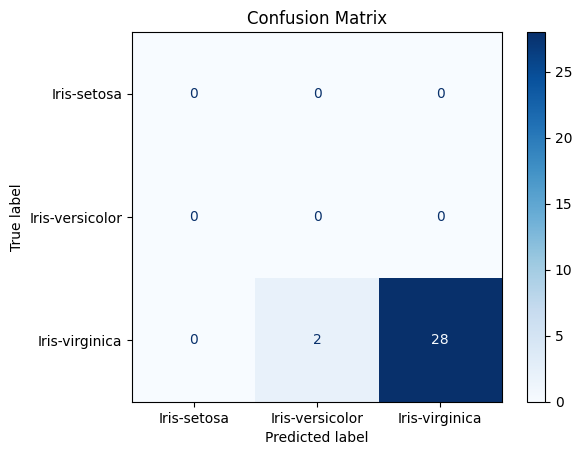


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00         0
Iris-versicolor       0.00      0.00      0.00         0
 Iris-virginica       1.00      0.93      0.97        30

       accuracy                           0.93        30
      macro avg       0.33      0.31      0.32        30
   weighted avg       1.00      0.93      0.97        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

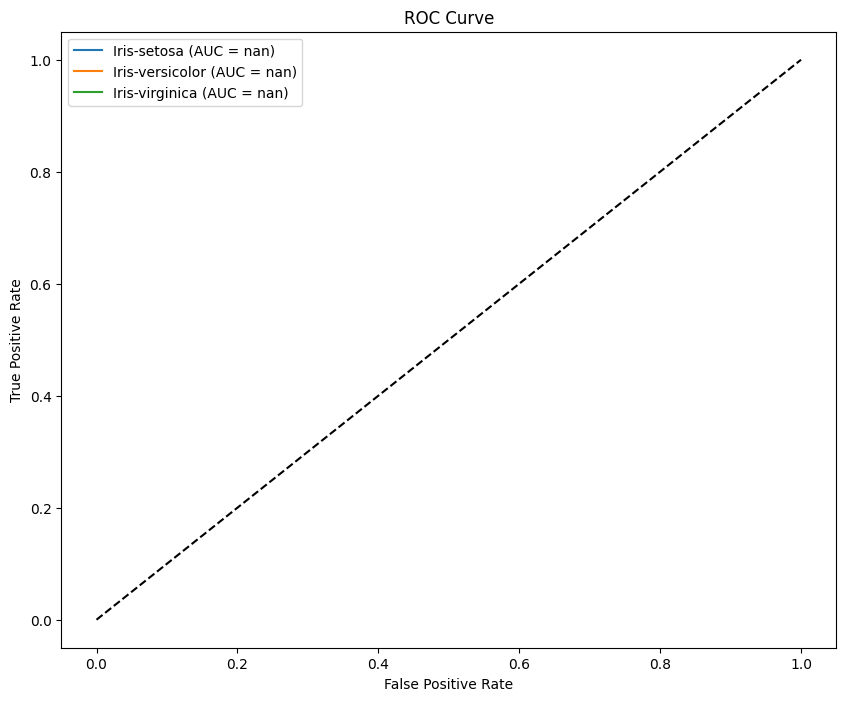

In [6]:
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    RocCurveDisplay
)
from collections import defaultdict

# Step 1: Separate By Class
def separate_by_class(dataset):
    separated = defaultdict(list)
    for row in dataset:
        features, label = row[:-1], row[-1]
        separated[label].append(features)
    return separated

# Step 2: Summarize Dataset
def summarize_dataset(dataset):
    summaries = [(mean(column), stdev(column)) for column in zip(*dataset)]
    return summaries

# Step 3: Summarize Data By Class
def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = {}
    for class_value, rows in separated.items():
        summaries[class_value] = summarize_dataset(rows)
    return summaries

# Helper: Mean of a list
def mean(numbers):
    return sum(numbers) / len(numbers)

# Helper: Standard Deviation of a list
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([(x - avg) ** 2 for x in numbers]) / (len(numbers) - 1)
    return math.sqrt(variance)

# Step 4: Gaussian Probability Density Function
def gaussian_probability(x, mean, stdev):
    exponent = math.exp(-((x - mean) ** 2 / (2 * stdev ** 2)))
    return (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent

# Step 5: Class Probabilities
def calculate_class_probabilities(summaries, row):
    total_rows = sum([len(rows) for rows in summaries.values()])
    probabilities = {}
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = len(class_summaries) / total_rows
        for i, (mean, stdev) in enumerate(class_summaries):
            probabilities[class_value] *= gaussian_probability(row[i], mean, stdev)
    return probabilities

# Predict the class for a single row
def predict(summaries, row):
    probabilities = calculate_class_probabilities(summaries, row)
    return max(probabilities, key=probabilities.get)

# Load dataset
def load_csv(filename):
    with open(filename, 'r') as file:
        lines = csv.reader(file)
        dataset = list(lines)
        for i in range(len(dataset)):
            dataset[i] = [float(x) if i < 4 else x for i, x in enumerate(dataset[i])]
    return dataset

# Split dataset into train and test
def train_test_split(dataset, split=0.8):
    train_size = int(split * len(dataset))
    train, test = dataset[:train_size], dataset[train_size:]
    return train, test

# Main program
if __name__ == "__main__":
    # Load the Iris dataset
    filename = "iris.csv"
    dataset = load_csv(filename)

    # Split the dataset
    train, test = train_test_split(dataset)
    test_data, test_labels = [row[:-1] for row in test], [row[-1] for row in test]

    # Summarize the training data by class
    summaries = summarize_by_class(train)

    # Make predictions
    predictions = [predict(summaries, row) for row in test_data]

    # Accuracy
    print(f"Accuracy: {accuracy_score(test_labels, predictions) * 100:.2f}%")

    # Confusion Matrix
    cm = confusion_matrix(test_labels, predictions, labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
    print("Confusion Matrix:\n", cm)

    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    # Precision, Recall, F1-Score
    print("\nClassification Report:")
    print(classification_report(
    test_labels,
    predictions,
    labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"],
    target_names=["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
))


    # ROC Curve (One-vs-Rest for Multiclass)
    classes = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
    test_labels_binary = np.array([[1 if label == cls else 0 for cls in classes] for label in test_labels])
    predictions_binary = np.array([[1 if pred == cls else 0 for cls in classes] for pred in predictions])

    plt.figure(figsize=(10, 8))
    for i, cls in enumerate(classes):
        fpr, tpr, _ = roc_curve(test_labels_binary[:, i], predictions_binary[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{cls} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], "k--")  # Diagonal line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()


When AUC (Area Under the Curve) is NaN, it means that the calculation of the Area Under the Receiver Operating Characteristic (ROC) Curve failed to produce a valid number. This typically happens when the input data (true labels and predicted scores) doesn't meet the requirements for ROC curve computation.

**Common Reasons for AUC Being NaN:**

Single Class in y_true:

The true labels (y_true) contain only one class, making it impossible to calculate meaningful ROC metrics.
For example, if all y_true values are 0, there are no positive samples, so True Positive Rate (TPR) and False Positive Rate (FPR) are undefined.
Constant Predicted Probabilities:

If the predicted probabilities (y_pred) are constant (e.g., all values are the same, such as 0.5), the ROC curve cannot be constructed.
Invalid Inputs:

If the predicted probabilities or true labels have invalid values (e.g., NaN or infinite values), the AUC calculation will fail.